In [ ]:
# !apt-get install nvidia-cuda-toolkit
# !pip3 install numba
# !pip install wurlitzer
# !pip install orca

In [24]:
from google.colab.output import eval_js
print(eval_js("google.colab.kernel.proxyPort(8080)"))

#!pip install vprof

# !vprof -c cmh kmeans_cpu.py --output-file profile.json
# !vprof --input-file profile.json

!python -m cProfile -o program.prof kmeans_cpu.py
!pip install snakeviz
!snakeviz program.prof


https://taswsf7pgll-496ff2e9c6d22116-8080-colab.googleusercontent.com/
Port 8080 in use, trying another.
snakeviz web server started on 127.0.0.1:8081; enter Ctrl-C to exit
http://127.0.0.1:8081/snakeviz/%2Fcontent%2Fparallelized-PSO-clustering%2FCode%2Fkmeans%2Fprogram.prof
snakeviz: error: no web browser found: could not locate runnable browser

usage: snakeviz [-h] [-v] [-H ADDR] [-p PORT] [-b BROWSER_PATH] [-s] filename

Start SnakeViz to view a Python profile.

positional arguments:
  filename              Python profile to view

optional arguments:
  -h, --help            show this help message and exit
  -v, --version         show program's version number and exit
  -H ADDR, --hostname ADDR
                        hostname to bind to (default: 127.0.0.1)
  -p PORT, --port PORT  port to bind to; if this port is already in use a free
                        port will be selected automatically (default: 8080)
  -b BROWSER_PATH, --browser BROWSER_PATH
                        name of

# git repo setup

In [1]:
# !rm parallelized-PSO-clustering -r
!git clone https://ms03831:hahaha:D1985764@github.com/ms03831/parallelized-PSO-clustering

Cloning into 'parallelized-PSO-clustering'...
remote: Enumerating objects: 154, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (119/119), done.
remote: Total 154 (delta 85), reused 88 (delta 31), pack-reused 0
Receiving objects: 100% (154/154), 893.40 KiB | 19.01 MiB/s, done.
Resolving deltas: 100% (85/85), done.


In [9]:
#%cd parallelized-PSO-clustering/
#%cd Code/kmeans
#%cp ../../../drive/MyDrive/Colab\ Notebooks/kMeansClusteringC* .
#%ls .!nvprof
%ls 

kMeansClusteringCUDA.ipynb  kmeans_cpu.py  kmeans_gpu.py  main.py  utils.py


In [31]:
!nvprof python kmeans_gpu.py

==427== NVPROF is profiling process 427, command: python3 kmeans_gpu.py
The score of best Kmeans clustering is: 2.7785047382638597
<Figure size 640x480 with 1 Axes>
==427== Profiling application: python3 kmeans_gpu.py
==427== Profiling result:
            Type  Time(%)      Time     Calls       Avg       Min       Max  Name
 GPU activities:   30.84%  18.624us        15  1.2410us  1.1840us  1.7280us  [CUDA memcpy HtoD]
                   29.46%  17.792us        13  1.3680us  1.3120us  1.5360us  [CUDA memcpy DtoH]
                   23.21%  14.016us         4  3.5040us  2.9120us  4.2880us  cudapy::__main__::findNearestCluster$241(Array<double, int=2, C, mutable, aligned>, Array<double, int=2, C, mutable, aligned>, Array<double, int=1, C, mutable, aligned>)
                   16.48%  9.9520us         4  2.4880us  1.9840us  3.9360us  cudapy::__main__::calculateMeanNewClusters$244(Array<double, int=2, C, mutable, aligned>, Array<double, int=1, C, mutable, aligned>, Array<float, int=2, C, mu

In [21]:
!git config --global user.email "ms03831@st.habib.edu.pk"
!git config --global user.name "ms03831"

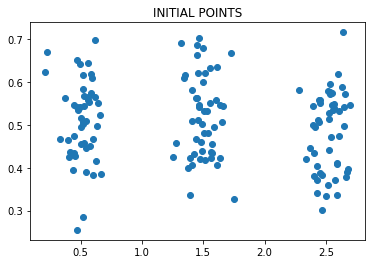

(3, 2)


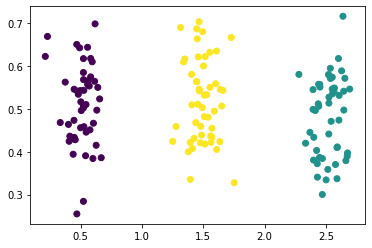

The score of best Kmeans clustering is: 2.77850473824771


<module 'kmeans_cpu' from '/content/parallelized-PSO-clustering/Code/kmeans/kmeans_cpu.py'>

In [29]:
import kmeans_cpu
import importlib
importlib.reload(kmeans_cpu)

In [30]:
commitmsg = "kmeans cpu updated"
!git add kmeans_cpu.py
!git commit -m commitmsg
!git push origin main

[main cfa1d02] commitmsg
 1 file changed, 3 insertions(+), 3 deletions(-)
Counting objects: 5, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (5/5), done.
Writing objects: 100% (5/5), 456 bytes | 456.00 KiB/s, done.
Total 5 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/ms03831/parallelized-PSO-clustering
   eae2bd6..cfa1d02  main -> main


In [ ]:
commitmsg = "kmeans gpu still not working"
!git add kmeans_gpu.py
!git commit -m commitmsg
!git push origin main

# Code

In [ ]:
from sklearn import datasets
from sklearn.decomposition import PCA

def getPointsFromDataIris():
    # Iris
    iris = datasets.load_iris()
    data = iris.data
    labels = iris.target
    maxi = data.max(axis = 0)
    mini = data.min(axis = 0)
    data = (data - mini) / (maxi - mini)
    return data, labels, 3

def getPointsFromDataDigits():
    # Digits
    digits = datasets.load_digits()
    data = digits.data
    labels = digits.target

    n_digits = 10
    data = PCA(n_components=2).fit_transform(data)

    maxi = data.max(axis = 0)
    mini = data.min(axis = 0)
    diff = maxi - mini
    diff = (diff == 0) + diff
    data = (data - mini) / (diff)
    return data, labels, 10



change in centroids  2.6906690854539654
change in centroids  0.30050749759985507
change in centroids  0.1227241956303195
change in centroids  0.08446544864165148
change in centroids  0.052539896010590004
change in centroids  0.03358185150571542
change in centroids  0.02598762722760118
change in centroids  0.021485647533363128
change in centroids  0.018776223196235446
change in centroids  0.015804749143793498
change in centroids  0.0161115589770799
change in centroids  0.015474361113708044
change in centroids  0.01894336229174129
change in centroids  0.013511415578917739
change in centroids  0.007413541999685772
change in centroids  0.004584547749320743
change in centroids  0.0019789920379776433
change in centroids  0.0035333782498557583
change in centroids  0.002691974049903241
change in centroids  0.0019869865513383114
change in centroids  0.0025819338067640555
change in centroids  0.0019727734134829334
change in centroids  0.0025104661643838523
change in centroids  0.0036214385816855

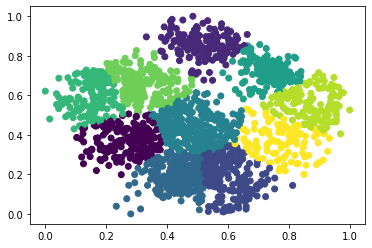

The score of best Kmeans clustering is: 16.16576654981362


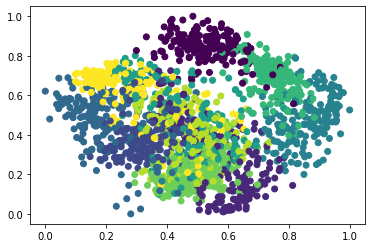

In [ ]:
import kmeans_cpu
import importlib
importlib.reload(kmeans_cpu)

from kmeans_cpu import runKMeans, initializePoints, clusterQuality
import matplotlib.pyplot as plt
import numpy as np
import random 

ITER = 1

seed = 20
np.random.seed(seed)
random.seed(seed)

# K = 3
# N = 50
# points = initializePoints(N, K)

points, labels, K = getPointsFromDataDigits()
points = points[:, :2]

# plt.scatter(*zip(*points), color='red', alpha = 0.2, edgecolor='blue')
# plt.title("INITIAL POINTS")
# plt.show()

clustering = runKMeans(points,K,ITER,True)
print ("The score of best Kmeans clustering is:", clusterQuality(clustering))

plt.scatter(points[:, 0], points[:, 1], c = labels)
plt.show()

In [ ]:
import random
from matplotlib import pyplot as plt
from numpy import random as rand
import numpy as np
import math
from numba import njit, cuda
import numpy
import numba

@cuda.jit(device=True)
def my_inf():
    return np.inf

def initializePoints(n, c = 3):
    l = [   
            [random.gauss(0.5, 0.1) + j, 
            random.gauss(0.5, 0.1)] 
            for j in range(c) for i in range(n)
        ]
    random.shuffle(l)
    return np.array(l)

def changeCPU(prev, current): #to compute change in previous and current centroids
    prev = np.array(prev); current = np.array(current)
    return np.linalg.norm(prev-current)

def change(prev, current, changeInCentroidsGPU): #to compute change in previous and current centroids
    temp = 0.
    for i in range(prev.shape[0]):
        temp += ( (prev[i][0] - current[i][0]) ** 2 + 
                  (prev[i][1] - current[i][1]) ** 2   )
    changeInCentroidsGPU[0] = temp ** 0.5

@cuda.jit
def calculateMeanNewClusters(points, cluster, centroids, pointsPerCluster):
    p = cuda.grid(1)
    if(p < points.shape[0]):
        for d in range(points.shape[1]):
            numba.cuda.atomic.add(centroids, (cluster[p], d), points[p][d])
        numba.cuda.atomic.add(pointsPerCluster, (cluster[p], 0), 1)
    
@cuda.jit
def findNearestCluster(points, centroidsGPU, clusterGPU):
    p = cuda.grid(1)
    if(p < points.shape[0]):
        minDistanceCentroid = -1
        minDistance = my_inf()
        for c in range(len(centroidsGPU)):
            distance = 0
            for d in range(points.shape[1]):
                distance += (points[p][d] - centroidsGPU[c][d]) ** 2
            if minDistance > distance:
                minDistance = distance
                minDistanceCentroid = c
        clusterGPU[p] = minDistanceCentroid

def myCluster(points, K, visuals = True, pointsAlreadyOnGPU = False, centroids = None):
    blockdim = 16
    griddim = 1 + (len(points) - 1)//blockdim

    #Your kmeans code will go here to cluster given points in K clsuters. If visuals = True, the code will also plot graphs to show the current state of clustering
    if not centroids:
        centroids = np.array([points[i] for i in rand.randint(0, len(points), K)]) #random centroids

    prevCentroids = np.ones(shape=centroids.shape) * float('inf')
    changeInCentroids = np.array([changeCPU(prevCentroids, centroids)])
    iteration = 0

    if pointsAlreadyOnGPU:
        pointsGPU = points
    else:
        pointsGPU = cuda.to_device(points)

    centroidsGPU = cuda.to_device(centroids)
    prevCentroidsGPU = cuda.to_device(prevCentroids)

    changeInCentroidsGPU =  cuda.device_array_like(changeInCentroids)
    
    clusters = np.zeros((len(points)), dtype=np.float64)
    clusterGPU = cuda.device_array_like(clusters)

    # pointsPerCluster = np.zeros((len(centroids), 1))
    # pointsPerClusterGPU = cuda.to_device(pointsPerCluster)

    while changeInCentroids[0] > 0.001: #stopping condition
        iteration += 1
        
        findNearestCluster[griddim, blockdim](pointsGPU, centroidsGPU, clusterGPU)
        numba.cuda.synchronize()
        
        prevCentroids = centroidsGPU.copy_to_host()
        
        # centroids = centroidsGPU.copy_to_host()

        # clusters = clusterGPU.copy_to_host()
        pointsPerCluster = np.zeros((len(centroids), 1), dtype=np.int32)
        pointsPerClusterGPU = cuda.to_device(pointsPerCluster)

        centroids = np.zeros_like(centroids, dtype=np.float32)
        centroidsGPU = cuda.to_device(centroids)

        calculateMeanNewClusters[griddim, blockdim](pointsGPU, clusterGPU, centroidsGPU, pointsPerClusterGPU)
        numba.cuda.synchronize()

        # centroidsGPU = cuda.to_device(centroids)
        centroids = centroidsGPU.copy_to_host()
        pointsPerCluster = pointsPerClusterGPU.copy_to_host()
        centroids = centroids / np.maximum(pointsPerCluster, 1)

        # centroids = centroids * (pointsPerCluster != 0)

        centroids = centroids + prevCentroids * (pointsPerCluster == 0)


        # clusters = clusterGPU.copy_to_host()
        # plt.scatter(points[:, 0], points[:, 1], c = clusters)
        # plt.plot(centroids[:, 0], centroids[:, 1], "kX")
        # plt.show()

        centroidsGPU = cuda.to_device(centroids)

        changeInCentroids[0] = changeCPU(prevCentroids, centroids)

    clusters = clusterGPU.copy_to_host()
    return clusters, centroids

def SSE(points, clusters, centroids):
    distances = np.array([points[i] - centroids[int(clusters[i])] for i in range(len(points))])
    squaredDistances = np.array([np.linalg.norm(distances[i])**2 for i in range(len(clusters))])
    return np.sum(squaredDistances)

def clusterQuality(points, clusters, centroids):
    score = SSE(points, clusters, centroids)
    return score

def runKMeans(points, K, N, visuals):
    clusters = None
    N = 1
    minimumScore, minimumScoreCluster = math.inf, None
    clusters, centroids = myCluster(points, K, visuals = False)
    return clusters, centroids

    # if ((i + 1) % 5 == 0):    
    #     plt.figure()
    #     for c in clusters:
    #         plt.scatter(*zip(*c), alpha = 0.4)
    #     plt.plot([centroids[i][0] for i in range(K)], [centroids[i][1] for i in range(K)], 'kX', markersize=10, label="clusters")
    #     plt.legend()
    #     plt.title("{0} points clustered into {1} clusters in iteration number {2}".format(len(points), K, i + 1))
    #     plt.show()
    # score = clusterQuality(clusters)
    # if score < minimumScore: 
    #     minimumScore = score
    #     mininumScoreCluster = clusters
    # return clusters



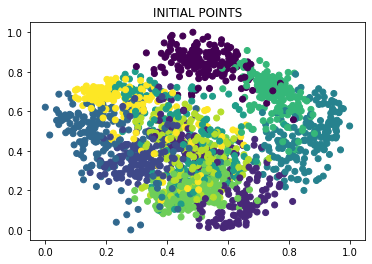

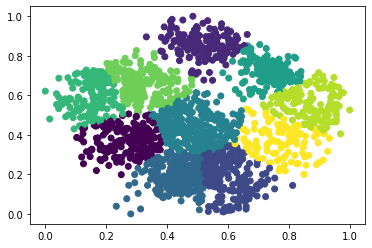

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random

# seed = 20
random.seed(seed)
np.random.seed(seed)

points, labels, K = getPointsFromDataDigits()
N = len(points)

plt.scatter(points[:,0], points[:,1], c=labels)
plt.title("INITIAL POINTS")
plt.show()

clusters, centroids = runKMeans(points,K,N,True)

plt.scatter(points[:, 0], points[:, 1], c=clusters)
plt.show()

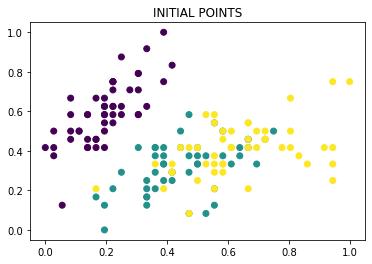

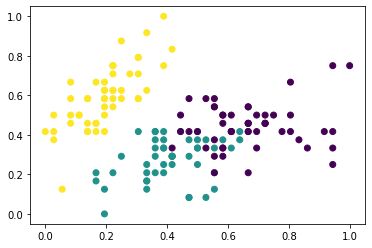

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import random

# points, labels, K = getPointsFromDataIris()
# N = len(points)

# plt.scatter(points[:,0], points[:,1], c=labels)
# plt.title("INITIAL POINTS")
# plt.show()

# clusters, centroids = runKMeans(points,K,N,True)

# plt.scatter(points[:, 0], points[:, 1], c=clusters)
# plt.show()

In [ ]:
# import matplotlib.pyplot as plt
# import numpy as np
# import random


# # # seed = 20
# # K = 5
# # N = 50
# # np.random.seed(seed)
# # random.seed(seed)
# # points = initializePoints(N, K)
# # # points = np.array([[0.5, 0.5], [1.5, 0.5], [2.5, 0.5], [3.5, 0.5], [4.5, 0.5]])

# plt.scatter(*zip(*points), color='red', alpha = 0.2, edgecolor='blue')
# plt.title("INITIAL POINTS")
# plt.show()

# clusters, centroids = runKMeans(points,K,N,True)

# plt.scatter(points[:, 0], points[:, 1], c=clusters)
# plt.show()
# #print ("The score of best Kmeans clustering is:", clusterQuality(points, clusters, centroids))

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')